# Frequencies Dancing - with Si5351
- https://www.silabs.com/documents/public/data-sheets/Si5351-B.pdf
- https://www.silabs.com/documents/public/application-notes/AN619.pdf

In [1]:
import os, sys

def gen_relative_path(target_path): 
    
    def del_same_parents(target_path, current_path):
        if len(target_path) * len(current_path) > 0:
            if target_path[0] == current_path[0]:
                target_path.pop(0)
                current_path.pop(0)
                del_same_parents(target_path, current_path)
            
    current_path = os.getcwd().replace('\\', '/').split('/')
    target_path = target_path.replace('\\', '/').split('/')
    del_same_parents(target_path, current_path)
    
    return ['..'] * len(current_path) + target_path


def append_source_relative_path(source_relative_path):
    sys.path.append(os.sep.join(source_relative_path))

In [2]:
# paths = ['']
# paths = [gen_relative_path(p) for p in paths]
# print(paths)

In [3]:
paths = [['..', '..', '..', '..', '..', '..', 'ORM', 'bitbucket', 'github', 'codes'],
         ['..', '..', '..', '..', '..', '..', 'USB', 'Universal Serial Bus', 'bitbucket', 'github', 'codes'],
         ['..', '..', '..', '..', '..', '..', '..', '已完成', 'Bridges', 'bitbucket', 'github', 'codes'], 
         ['..', '..', '..', '..', '..', '..', 'Utilities', 'bitbucket', 'github', 'codes'],
         ['..', '..', '..', 'codes']]

for path in paths:
    append_source_relative_path(path)

In [4]:
%pylab inline

from clock_generators.si535x.si5351 import Si5351A_B_GT
from utilities.adapters import peripherals

import time

Populating the interactive namespace from numpy and matplotlib


## Debug mode?

In [5]:
cls = Si5351A_B_GT

cls.DEBUG_MODE_SHOW_BUS_DATA = False         # whether to show bus data. 
cls.DEBUG_MODE_PRINT_REGISTER = False        # whether to print registers. 

## Generators and Modulators

In [6]:
with_hardware_device = True

if with_hardware_device:
    _i2c = peripherals.I2C.get_Ftdi_i2c() 
    
else:
    _i2c =  None  # using None for testing without actual hardware device.

si = cls(_i2c)

## Three Singals

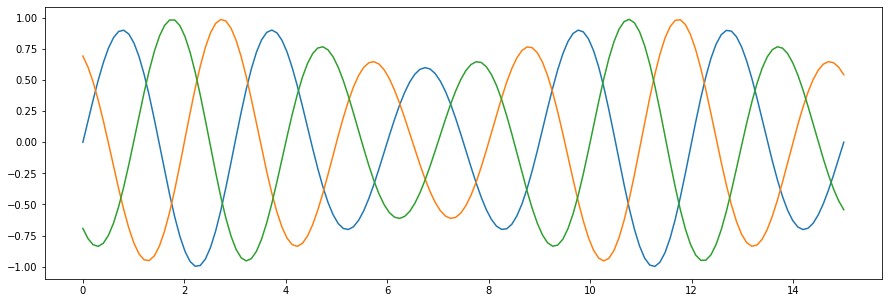

In [7]:
freq = 1/3
fs = 10
Ts = 1/fs

duration = 15
t = np.linspace(0, duration, fs * duration)

n_dancers = 3
ys = np.array([np.sin(2 * np.pi * freq * t + 2*np.pi / n_dancers * i)for i in range(n_dancers)])

freq_amp = freq / 3
amps = (np.sin(2 * np.pi * freq_amp * t) + 4) / 5

ys = ys * amps

plt.figure(figsize = (15, 5))

for i in range(3):
    plt.plot(t, ys[i]);

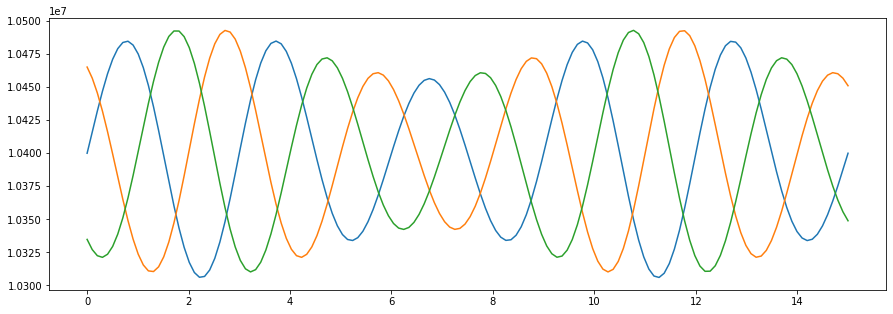

In [8]:
freq_center = 10.4e6
bandwidth = 192e3 * 0.98 / 2  # limit of SWFM on SDRuno

freq_dancers = (freq_center + ys * bandwidth).astype(int)

plt.figure(figsize = (15, 5))
for i in range(3):
    plt.plot(t, freq_dancers[i]);

In [9]:
freq_dancers.T[:10]

array([[10400000, 10465180, 10334819],
       [10416028, 10456841, 10327129],
       [10431884, 10445611, 10322504],
       [10446823, 10431908, 10321267],
       [10460113, 10416290, 10323595],
       [10471075, 10399425, 10329499],
       [10479118, 10382066, 10338815],
       [10483773, 10365017, 10351208],
       [10484721, 10349092, 10366185],
       [10481815, 10335075, 10383109]])

### Three Frequencies Dancing - with Si5351

In [10]:
si.init()

In [11]:
si.enable(False)

In [ ]:
clks = si.clocks[:3]

si.enable(True)

for row in freq_dancers.T:
    
    for i in range(3):
        clks[i].set_frequency(row[i])